In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)

tf.random.set_seed(777)

2.13.0


# Lab 06 - 1 Softmax Classifier

## Multinomial Classification


*   여러가지 클래스가 있을 때 사용
*   $\begin{bmatrix} w_{A1} & w_{A2} & w_{A3}\\ w_{B1} & w_{B2} & w_{B3}\\ w_{C1} & w_{C2} & w_{C3} \end{bmatrix}$ $\begin{bmatrix}x_1\\x_2\\x_3 \end{bmatrix}$ = $\begin{bmatrix} w_{A1}x_1 + w_{A2}x_2 + w_{A3}x_3\\ w_{B1}x_1 + w_{B2}x_2 + w_{B3}x_3\\ w_{C1}x_1 + w_{C2}x_2 + w_{C3}x_3 \end{bmatrix}$ = $\begin{bmatrix}\bar{y}_A\\ \bar{y}_B\\ \bar{y}_C \end{bmatrix}$

## Softmax function


*   입력받은 값을 출력할 때 0~1 사이의 값으로 정규화하며 출력 값들의 총합은 항상 1
*  $ f(\vec x)_i = \frac{e^{x_i}}{∑_{k=1}^K e^{x_k}} $ for $ i= 1, ..., K$




In [ ]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]
# one hot incoding - 특정 부분에 대해서만 표기를 해주고 나머지는 0으로 표기

x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

nb_classes = 3

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


In [ ]:
# Weight와 bias 설정
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[-1.0848901 ,  1.4508106 ,  0.89454556],
       [ 1.0585178 , -2.945737  ,  1.7492903 ],
       [ 0.9174221 , -1.609197  , -0.71461874],
       [ 0.9197077 , -1.4699976 ,  0.97345525]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([ 1.3761642 , -0.5906823 , -0.20909058], dtype=float32)>


In [ ]:
# Softmax function
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b) # scores -> probabilities

print(hypothesis(x_data))

sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))

tf.Tensor(
[[4.5080072e-01 1.9402207e-06 5.4919738e-01]
 [8.4867257e-01 1.4806192e-06 1.5132579e-01]
 [4.1030797e-01 7.5924632e-08 5.8969200e-01]
 [7.0437223e-01 9.6357766e-10 2.9562771e-01]
 [9.3473923e-01 2.3382822e-23 6.5260760e-02]
 [9.9767572e-01 1.1336759e-15 2.3243378e-03]
 [9.9283212e-01 9.9764588e-24 7.1679526e-03]
 [9.9703664e-01 1.3386043e-27 2.9633613e-03]], shape=(8, 3), dtype=float32)
tf.Tensor([[6.7084591e-07 1.1367554e-07 9.9999917e-01]], shape=(1, 3), dtype=float32)


In [ ]:
# Cost function: cross entropy
def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(13.788706, shape=(), dtype=float32)


In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
# Gradient Function
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        cost = cost_fn(X, Y)
        grads = tape.gradient(cost, variables) # variables = [W, b]
        return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 1.0148553 , -0.74999934, -0.26485595],
       [ 1.417466  , -1.2499993 , -0.1674668 ],
       [ 2.168491  , -1.8749992 , -0.29349172],
       [ 2.2384048 , -1.9999993 , -0.2384054 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.5420546 , -0.37499955, -0.16705509], dtype=float32)>]


In [ ]:
# train
def fit(X, Y, epochs=2000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))

fit(x_data, y_data)

Loss at epoch 1: 11.949127
Loss at epoch 100: 0.677330
Loss at epoch 200: 0.595334
Loss at epoch 300: 0.539561
Loss at epoch 400: 0.490081
Loss at epoch 500: 0.442989
Loss at epoch 600: 0.396819
Loss at epoch 700: 0.350944
Loss at epoch 800: 0.305397
Loss at epoch 900: 0.262527
Loss at epoch 1000: 0.236916
Loss at epoch 1100: 0.225014
Loss at epoch 1200: 0.214325
Loss at epoch 1300: 0.204569
Loss at epoch 1400: 0.195629
Loss at epoch 1500: 0.187407
Loss at epoch 1600: 0.179823
Loss at epoch 1700: 0.172805
Loss at epoch 1800: 0.166294
Loss at epoch 1900: 0.160238
Loss at epoch 2000: 0.154593


In [ ]:
# Prediction
a = hypothesis(x_data)

print(a)
print(tf.argmax(a, 1)) # argmax: 높은 값 출력
print(tf.argmax(y_data, 1))

tf.Tensor(
[[4.4693697e-06 1.0849851e-03 9.9891049e-01]
 [1.0544449e-03 8.2085334e-02 9.1686016e-01]
 [6.4015273e-09 1.6199443e-01 8.3800548e-01]
 [6.3840552e-08 8.5175729e-01 1.4824258e-01]
 [2.5291383e-01 7.3510081e-01 1.1985299e-02]
 [1.3319696e-01 8.6678874e-01 1.4250271e-05]
 [7.6096076e-01 2.3901376e-01 2.5472904e-05]
 [9.1595703e-01 8.4042437e-02 4.5025789e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


In [ ]:
# Prediction Check
sample_data = [[2,1,3,2]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a, 1))

b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1))

tf.Tensor([[0.00105445 0.08208534 0.9168602 ]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)
tf.Tensor(
[[4.4693697e-06 1.0849851e-03 9.9891049e-01]
 [1.0544449e-03 8.2085334e-02 9.1686016e-01]
 [6.4015273e-09 1.6199443e-01 8.3800548e-01]
 [6.3840552e-08 8.5175729e-01 1.4824258e-01]
 [2.5291383e-01 7.3510081e-01 1.1985299e-02]
 [1.3319696e-01 8.6678874e-01 1.4250271e-05]
 [7.6096076e-01 2.3901376e-01 2.5472904e-05]
 [9.1595703e-01 8.4042437e-02 4.5025789e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


In [ ]:
# Convert as Class
class softmax_classifer(tf.keras.Model):
    def __init__(self, nb_classes):
        super(softmax_classifer, self).__init__()
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')

    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)

    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))
        return cost

    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(x_data, y_data)
            grads = tape.gradient(cost, self.variables)
            return grads

    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self.variables))
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))

model = softmax_classifer(nb_classes)
model.fit(x_data, y_data)

Loss at epoch 1: 5.058578
Loss at epoch 500: 0.504987
Loss at epoch 1000: 0.280953
Loss at epoch 1500: 0.200320
Loss at epoch 2000: 0.164085


# Lab 06-2 Fancy Softmax Classifier

## Cross-entropy cost function


*   softmax 함수의 손실 함수
*   $ H(p, q) = - \sum_{x\in}p(x)logq(x)$



In [ ]:
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels_Y_one_hot)
cost = tf.reduce_mean(convert_to_tensor_v1_with_dispatch)

In [ ]:
# Sample Dataset
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6

Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [ ]:
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits,
                                                      from_logits=True)
    cost = tf.reduce_mean(cost_i)
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads

def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

In [ ]:
def fit(X, Y, epochs=500, verbose=50):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy()

            print('Loss & Acc at {} epoch {}, {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Loss & Acc at 1 epoch 3.9390292167663574, 0.21782177686691284
Loss & Acc at 50 epoch 0.9624758362770081, 0.6435643434524536
Loss & Acc at 100 epoch 0.6441816687583923, 0.7524752616882324
Loss & Acc at 150 epoch 0.505842924118042, 0.8811880946159363
Loss & Acc at 200 epoch 0.4241873025894165, 0.8910890817642212
Loss & Acc at 250 epoch 0.36794382333755493, 0.9009901285171509
Loss & Acc at 300 epoch 0.3259027302265167, 0.9207921028137207
Loss & Acc at 350 epoch 0.29286298155784607, 0.9306930899620056
Loss & Acc at 400 epoch 0.26599669456481934, 0.9306930899620056
Loss & Acc at 450 epoch 0.24359306693077087, 0.9405940771102905
Loss & Acc at 500 epoch 0.22453811764717102, 0.9603960514068604


# Lab 07-1 Application & Tips: 학습률과 데이터 전처리

## Learning rate

In [ ]:
# Gradient
def grad(hypothesis, labels):
  with tf.GradientTape() as tape:
    loss_value = loss_fn(hypothesis, labels)
  return tape.gradient(loss_value, [W, b])

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
optimizer.apply.gradients(grads and vars = zip(grads, [W,b]))

In [ ]:
# Annealing the learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 1000, 0.96, staircase)

def exponential_decay(epoch):
  starter_rate = 0.01
  k = 0.96
  exp_rate = starter_rate * exp(-k*t)
  return exp_rate

In [ ]:
# Feature Scaling
Standardization = (data -np.mean(data)) / sqrt(np.sum((data - np.mean(data))^2) / np.count(data))

Normalization = (data - np.min(data, 0)) / np.max(data, 0) - np.min(data, 0)

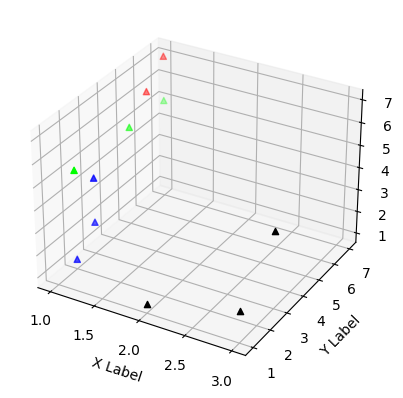

In [ ]:
x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
x3 = [x[2] for x in x_train]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y_train, marker='^')

ax.scatter(x_test[0][0], x_test[0][1], x_test[0][2], c="black", marker='^')
ax.scatter(x_test[1][0], x_test[1][1], x_test[1][2], c="black", marker='^')
ax.scatter(x_test[2][0], x_test[2][1], x_test[2][2], c="black", marker='^')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((3, 3)))
b = tf.Variable(tf.random.normal((3,)))

def softmax_fn(features):
    hypothesis = tf.nn.softmax(tf.matmul(features, W) + b)
    return hypothesis

def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hypothesis), axis=1))
    return cost

is_decay = True
starter_learning_rate = 0.1

if(is_decay):
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                 decay_steps=1000,
                                                                 decay_rate=0.96,
                                                                 staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b])

def accuracy_fn(hypothesis, labels):
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(softmax_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(softmax_fn(features),features,labels)))
x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 1.5728
Iter: 100, Loss: 0.6625
Iter: 200, Loss: 0.5711
Iter: 300, Loss: 0.5192
Iter: 400, Loss: 0.4820
Iter: 500, Loss: 0.4526
Iter: 600, Loss: 0.4282
Iter: 700, Loss: 0.4074
Iter: 800, Loss: 0.3894
Iter: 900, Loss: 0.3735
Iter: 1000, Loss: 0.3593
Testset Accuracy: 1.0000


# Lab 07-2-1 Application & Tips: Overfitting과 Solutions

## Overfitting



In [ ]:
# Set features
from sklearn.decomposition import PCA
pca = decomposition.PCA(n_components = 3)
pca.fit(X)
X = pca.transform(x)

In [ ]:
# Regularization (Add term to loss)
L2_loss = tf.nn.l2_loss(w)

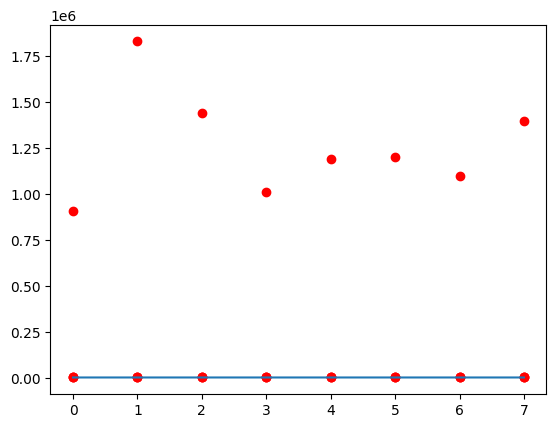

In [ ]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


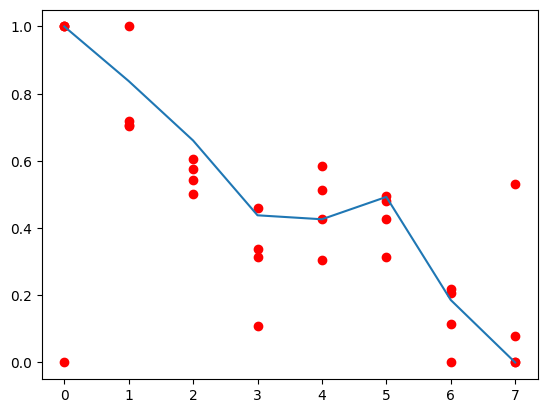

In [ ]:
xy = normalization(xy)
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b]), loss_value

In [ ]:
# L2 norm
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

In [ ]:
# Learning Decay
is_decay = True
starter_learning_rate = 0.1

if(is_decay):
  global_step = tf.Variable(0, trainable = False)
  learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(starter_learning_rate, global_step, 50, 0.96)
  optimizer = tf.keras.optimizers.SGD(learning_rate)

else:
  optimizer = tf.keras.optimizers.SGD(starter_learning_rate)

def grad(features, labels, l2_flag):
  with tf.GradientTape() as tape:
      loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
  return tape.gradient(loss_value, [W,b]), loss_value

In [ ]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars = zip(grads,[W,b]), global_step = global_step)

    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}, Learning Rate: {:.8f}".format(step, loss_value, optimizer._learning_rate()))

# Lab 07-3-1 Application & Tips: Data와 Learning

## Data sets

In [ ]:
# Good Case
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
model.fit(x_train, y_train, valition_spit = 0.2, epochs = 5)

In [ ]:
# Evaluating a hypothesis
test_acc = accuracy_fn(softmax_fn(x_test), y_test)
model.evaluate(x_test, y_test)

## Learning

In [ ]:
# Fine Tuning
saver = tf.train.import_meta_graph('my-model-1000.meta')
saver.restore(tf.train.latest_checkpoint('./'))

# Lab 07-3-2 Application & Tips: Dataset 실습

## Fashion MNIST-Image Classification

4422102/4422102 [==============================] - 0s 0us/step


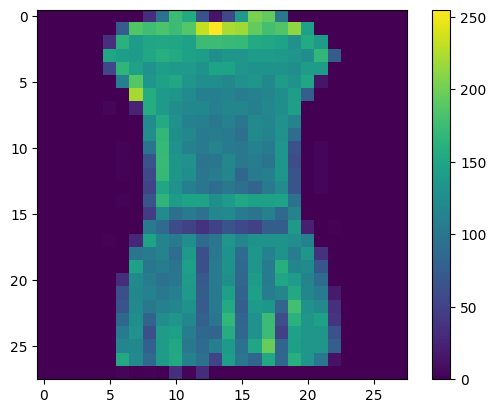

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

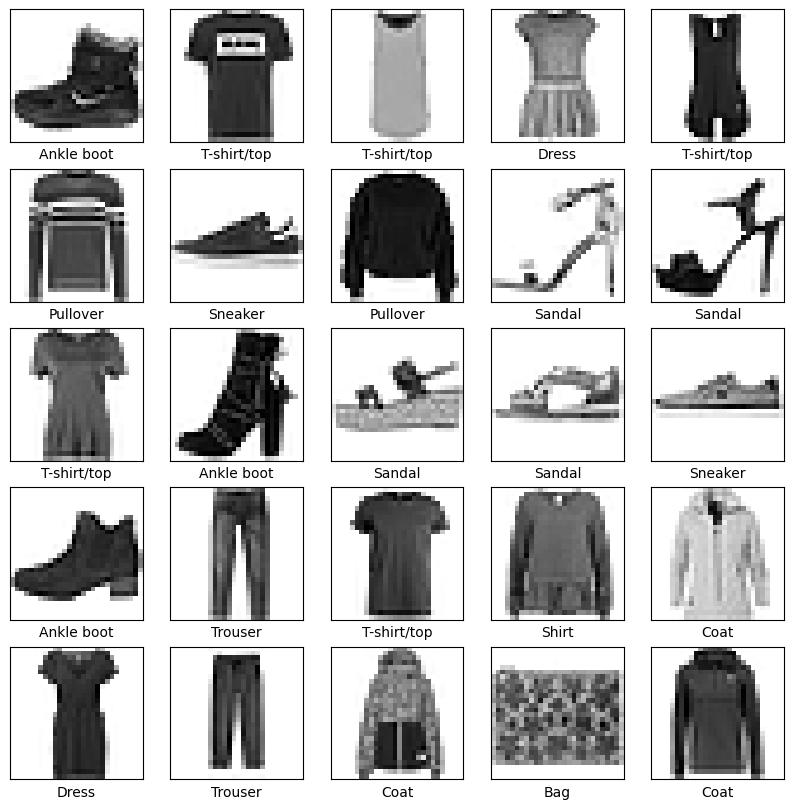

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4980 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3748 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3396 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3141 - accuracy: 0.8847
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8740
Test accuracy: 0.8740000128746033


## IMDB-Text Classification

In [ ]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])

1641221/1641221 [==============================] - 0s 0us/step
Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472,

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[4])

"<START> worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the <UNK> and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

In [ ]:
print(train_labels[4])

0


In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value = word_index["<PAD>"], padding = 'post', maxlen = 256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

print(len(train_data[0]), len(test_data[0]))
print(train_data[0])

print(len(train_data[0]), len(test_data[0]))
print(train_data[0])

256 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

In [ ]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 30ms/step - loss: 0.6925 - accuracy: 0.5421 - val_loss: 0.6916 - val_accuracy: 0.5006
Epoch 2/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6889 - accuracy: 0.5425 - val_loss: 0.6863 - val_accuracy: 0.6911
Epoch 3/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6809 - accuracy: 0.7127 - val_loss: 0.6754 - val_accuracy: 0.7396
Epoch 4/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6645 - accuracy: 0.7591 - val_loss: 0.6561 - val_accuracy: 0.7475
Epoch 5/40
30/30 [==============================] - 1s 37ms/step - loss: 0.6374 - accuracy: 0.7733 - val_loss: 0.6247 - val_accuracy: 0.7693
Epoch 6/40
30/30 [==============================] - 1s 43ms/step - loss: 0.5983 - accuracy: 0.7956 - val_loss: 0.5857 - val_accuracy: 0.7908
Epoch 7/40
30/30 [==============================] - 1s 25ms/step - loss: 0.5519 - accuracy: 0.8150 - val_loss: 0.5417 - val_accuracy: 0.8073
Epoch 8/40
30

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8725
[0.3308047950267792, 0.8725200295448303]
